In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
df = pd.read_csv("/Users/emrecanciftci/betik/2024_bio/data/09_Ch9/Supplementary files/heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 0)


In [4]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/opt/anaconda3/envs/env-bio/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred) 
print(cm)
accuracy_score(y_test, y_pred)
# true negatives is C_{0,0}, false positives is C_{0,1}
# false negatives is C_{1,0} true positives is C_{1,1} 
print(classifier.intercept_)
print(classifier.coef_)

[[24  9]
 [ 3 40]]
[0.01920378]
[[ 0.01244625 -1.54081515  0.82588324 -0.00715838 -0.00419995 -0.39319183
   0.26794349  0.02900013 -0.78341586 -0.56629861  0.25301607 -0.74191173
  -0.76456874]]


In [6]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76



In [9]:
coeff_df = pd.DataFrame(classifier.coef_.T, index=X.columns, columns=["Coefficient"] )
coeff_df

,Coefficient
age,0.012446
sex,-1.540815
cp,0.825883
trestbps,-0.007158
chol,-0.004200
fbs,-0.393192
restecg,0.267943
thalach,0.029000
exang,-0.783416
oldpeak,-0.566299


/var/folders/gr/_y8q_rln3m96p43ww2syvzj40000gn/T/ipykernel_10042/209612341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='thalach',x='target', data=df ,palette="coolwarm",ax=axes[1])


<Axes: xlabel='target', ylabel='thalach'>

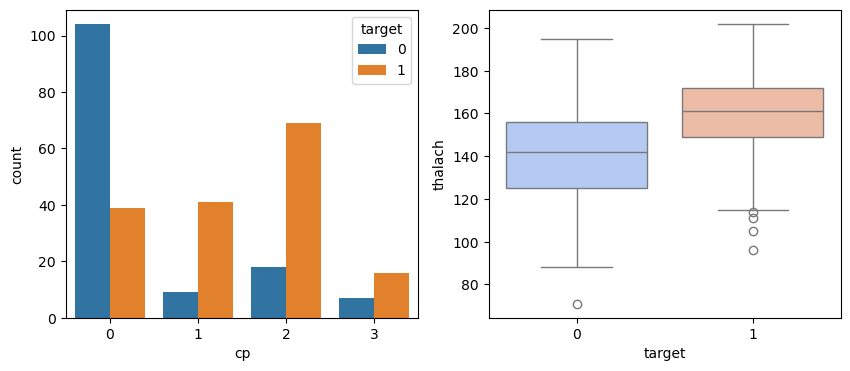

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sns.countplot(x="cp", hue="target", data=df, ax=axes[0])
sns.boxplot(y='thalach',x='target', data=df ,palette="coolwarm",ax=axes[1])

In [ ]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_norm, columns=df.iloc[:,:-1].columns)
X_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.407015e-16,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,2.345026e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-2.345026e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,1.465641e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-4.690051e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_minmax = sc.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=df.iloc[:,:-1].columns)
X_minmax.describe().T



,count,mean,std,min,25%,50%,75%,max
age,303.0,0.528465,0.189210,0.0,0.385417,0.541667,0.666667,1.0
sex,303.0,0.683168,0.466011,0.0,0.000000,1.000000,1.000000,1.0
cp,303.0,0.322332,0.344017,0.0,0.000000,0.333333,0.666667,1.0
trestbps,303.0,0.354941,0.165454,0.0,0.245283,0.339623,0.433962,1.0
chol,303.0,0.274575,0.118335,0.0,0.194064,0.260274,0.339041,1.0
fbs,303.0,0.148515,0.356198,0.0,0.000000,0.000000,0.000000,1.0
restecg,303.0,0.264026,0.262930,0.0,0.000000,0.500000,0.500000,1.0
thalach,303.0,0.600358,0.174849,0.0,0.477099,0.625954,0.725191,1.0
exang,303.0,0.326733,0.469794,0.0,0.000000,0.000000,1.000000,1.0
oldpeak,303.0,0.167678,0.187270,0.0,0.000000,0.129032,0.258065,1.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 0)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

